#An interesting and maybe useful example ;-)

In [ ]:
!pip install itk-io
!pip install itkwidgets
import itk

from itkwidgets import view

try:
    from urllib.request import urlretrieve
except ImportError:
    from urllib import urlretrieve
import os

     |████████████████████████████████| 14.0MB 306kB/s 
     |████████████████████████████████| 49.9MB 68kB/s 
     |████████████████████████████████| 3.4MB 2.7MB/s 
     |████████████████████████████████| 2.4MB 31.5MB/s 
     |████████████████████████████████| 471kB 39.0MB/s 
     |████████████████████████████████| 1.6MB 46.7MB/s 
     |████████████████████████████████| 593kB 39.0MB/s 
     |████████████████████████████████| 67.8MB 54kB/s 
     |████████████████████████████████| 256kB 47.0MB/s 
     |████████████████████████████████| 36.1MB 122kB/s 


In [ ]:
import os
file_name = '005_32months_T2_RegT1_Reg2Atlas_ManualBrainMask_Stripped.nrrd'
if not os.path.exists(file_name):
    url = 'https://data.kitware.com/api/v1/file/564a5b078d777f7522dbfaa6/download'
    urlretrieve(url, file_name)
image = itk.imread(file_name)

In [ ]:
import numpy as np

a=np.array(image)
a.shape

(250, 350, 300)

In [ ]:
import skimage.transform as si
im = si.resize(a,(25,35,30))

In [ ]:
x=[]
y=[]
z=[]
c=[]

for i in range(len(im)):
  for j in range(len(im[0])):
    for k in range(len(im[0][0])):
      if im[i][j][k]>0.01:
        x.append(i)
        y.append(j)
        z.append(k)
        c.append('rgba(1,1,1,'+str(im[i][j][k]/10)+')')

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=10,
        color=c,                # set color to an array/list of desired values
        colorscale='gray',   # choose a colorscal
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

#**Challenge 2:**

Orxan is a data scientist in the weather forecast organization of Azerbaijan Republic and he wants to visualize the weather temperature.

The only data he has is a temperature of 4 cities of  Azerbaijan. Astara 35, Zangilan 15, Nabran 45, Gazakh 25. He wants to find the estimated weather forecast of 5 major cities of Azerbaijan based on their distance from the above mentioned 4 cities. For example if the city is Khankandi, first he should scrap (important) and find the distance to each of those 4 cities which is 379km, 165km, 541km, 276km respectfully.

In order to find the positive correlation between distance and the temperature he should subtract those distances from 1000 which should be 621, 835, 459, 724 respectfully (which means- as this number rises, correlation between distance and temperature is getting higher as well).


After all, you should calculate the proportion of each number to their average, just like this:


<br />
Average = 621+835+459+724/4 = 2639

621/2639 = 0.24

835/2639 = 0.32

459/2639 = 0.17

724/2639 = 0.27

(0.24 * 35) + (0.32 * 15) + (0.17 * 45) + (0.27 * 25) = 27.6


<br />And 27.6 is the estimated forecast of Khankandi weather temperature.
<br />
Then He should visualize the weather forecast of these 9 cities (5+4) on the map of Azerbaijan.

<br />
Find the best way to visualize them on the map as a support for Orxan. 3D plots will have more grades. <br />

<br />
<br />
<br />
If you have any question please contact me via [this link](http://smalek.22web.org/co).

Good luck.

MY SOLUTION TO THIS TASK:

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (123 kB/s)
Reading package lists... Done
Reading package lists... Done
Building d

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning:

use options instead of chrome_options



In [ ]:
import pandas as pd
four_cities={'Astara':35,'Zangilan':15,'Nabran':45,'Qazax rayonu':25}#distance calculator count Gazakh as Ganja,so I changed it to Qazax rayonu
major_cities=['Baku','Ganja','Sumqayit','Lankaran','Mingachevir']
cities_distance=pd.DataFrame(index=major_cities,columns=four_cities.keys())

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
url='https://www.distancecalculator.net/'
delay=5   #using delay for 5 seconds to let the driver wait
wd.get(url)
for major_city in cities_distance.index:
  from_city=wd.find_element_by_id('distancefrom')
  from_city.send_keys(major_city)    #sending input to the distancefrom field
  for city in cities_distance.columns:      #for every major city we need to find 4 distances
    to_city=wd.find_element_by_id('distanceto')
    to_city.send_keys(city)     #sending input to the distanceto field
    button=wd.find_element_by_id('hae')
    button.click()   #clicking to find button
    distance=WebDriverWait(wd,delay).until(EC.presence_of_element_located((By.ID,'totaldistancekm'))).text   #waiting
    distance=distance.replace(' km','')
    distance=float(distance)
    cities_distance[city][major_city]=distance
    to_city=wd.find_element_by_id('distanceto')
    to_city.clear()    #clearing the input
  from_city=wd.find_element_by_id('distancefrom')
  from_city.clear()  #clearing the input

In [ ]:
cities_distance

,Astara,Zangilan,Nabran,Qazax rayonu
Baku,232.48,308.63,525.76,386.55
Ganja,366.9,205.83,280.42,58.71
Sumqayit,250.4,307.34,499.2,367.06
Lankaran,58.98,171.16,576.8,368.04
Mingachevir,303.08,189.5,331.91,147.16


In [ ]:
cities_distance=cities_distance.values

I have discovered interesting pattern in your formulas,so thats why I wanted to add some creativity on it.I have discovered that using one constant distance for all cities gives more accurate and spreaded result,rather than  using separate distance for each city.When I use each separate distance,it gives almost 29 for all cities,which is not good for vizualizing.

In [ ]:
#constant distance(I took Mingachevir)
distancies=cities_distance[-1]
distancies=list(distancies)
distancies_subtract=[1000-x for x in distancies]
summing_average=sum(distancies_subtract)

In [ ]:
#calculation
temperature_of_major_cities={}
temperatures=list(four_cities.values())
for major_city_index in range(len(major_cities)):
  correlations=[]
  predicted_temperature=0
  distancies=cities_distance[major_city_index]
  distancies=list(distancies)
  distancies_subtract=[1000-x for x in distancies]
  #summing_average=sum(distancies_subtract)
  for distance in distancies_subtract:
    correlation=distance/summing_average
    correlations.append(correlation)
  for correlation,temperature in zip(correlations,temperatures):
    predicted_temperature+=correlation*temperature
  temperature_of_major_cities[major_cities[major_city_index]]=round(predicted_temperature,2)

In [ ]:
temperature_of_major_cities

{'Baku': 24.41,
 'Ganja': 29.71,
 'Lankaran': 26.49,
 'Mingachevir': 29.04,
 'Sumqayit': 24.76}

AS YOU SEE,I GET ALMOST PERFECT RESULT.SUMGAYIT AND BAKU GET 26 DEGREES,BECAUSE THERE ARE LOCATED NEARLY,GANJA AND MINGACHEVIR GETS 29,WHICH IS ALSO CORRECT,BECAUSE THEY ARE NEAR TO EACH OTHER.

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756182 sha256=98d026d6c63038e91140ad32f0c5be2f250a3aa1a66921571f7a11ed9f6e66ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-1n9c695a/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [ ]:
!pip install pyproj==1.9.6

In [ ]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
lons = np.array([49.867092,45.986530,49.665161,48.616360,47.043809,48.868556,46.655807,48.693867,45.357739]) # longtitude
lats = np.array([40.409264,40.867100,40.593849,38.918388,40.762341,38.448426,39.081467,41.763374,41.091410]) # latitude
temperatures_mc=np.array(list(temperature_of_major_cities.values()))
temperatures_c=np.array(list(four_cities.values()))
temperatures=np.concatenate([temperatures_mc,temperatures_c])

In [ ]:
temperatures

array([24.41, 29.71, 24.76, 26.49, 29.04, 35.  , 15.  , 45.  , 25.  ])

In [ ]:
cities=['Baku','Ganja','Sumqayit','Lankaran','Mingachevir','Astara','Zangilan','Nabran','Gazakh']

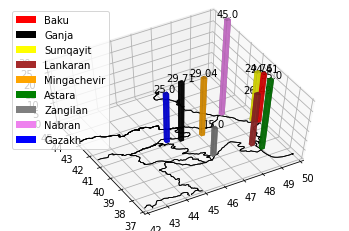

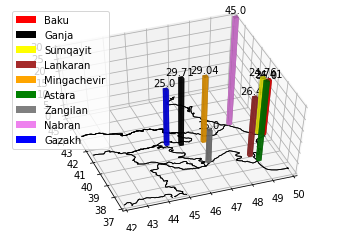

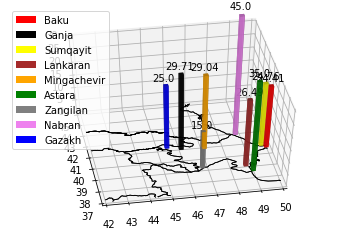

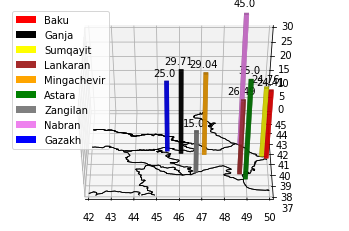

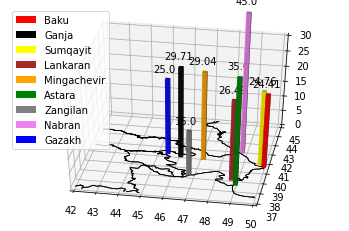

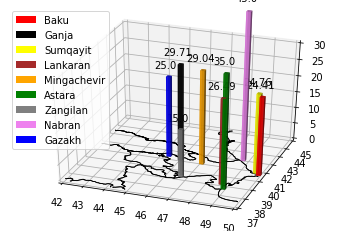

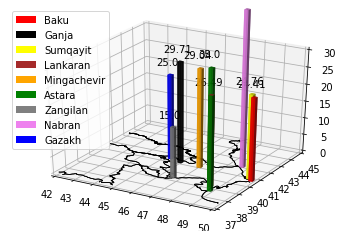

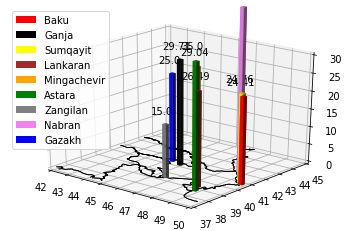

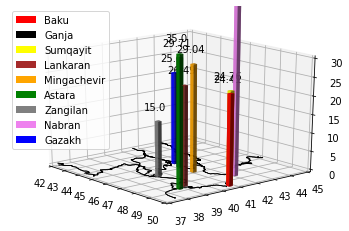

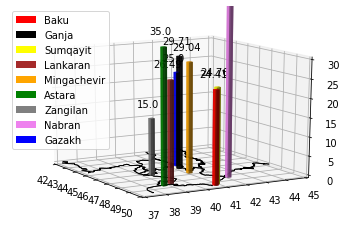

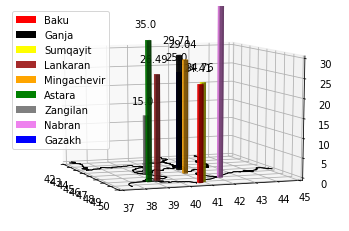

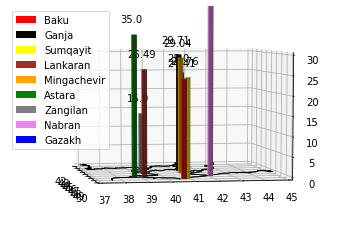

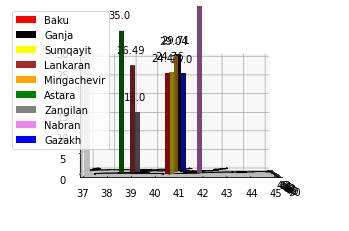

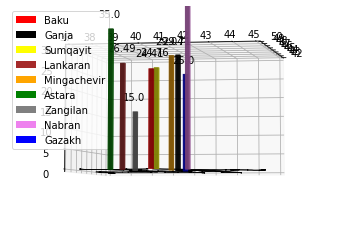

In [ ]:
for rounding in range(14):
  fig = plt.figure()
  ax = fig.gca(projection='3d')


  # Define lower left, uperright lontitude and lattitude respectively
  extent = [42,50,37,45]
  # Create a basemap instance that draws the Earth layer
  bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
              urcrnrlon=extent[1], urcrnrlat=extent[3],
              projection='cyl', resolution='i', fix_aspect=False, ax=ax,area_thresh=100000)
  # Add Basemap to the figure
  ax.add_collection3d(bm.drawcoastlines(linewidth=0.8))
  ax.add_collection3d(bm.drawcountries(linewidth=0.8))
  ax.view_init(azim=240+10*rounding, elev=60-5*rounding)
  # Add meridian and parallel gridlines
  lon_step = 1
  lat_step = 1
  meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
  parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
  ax.set_yticks(parallels)
  ax.set_yticklabels(parallels)
  ax.set_xticks(meridians)
  ax.set_xticklabels(meridians)
  ax.set_zlim(0., 30.)
  colors=['red','black','yellow','brown','orange','green','grey','violet','blue']
  proxies=[]
  # Add a colorbar to reference the intensity
  ax.bar3d(lons,lats,0,0.2,0.2,temperatures,alpha=0.8,color=colors)
  for i,(lon,lat) in enumerate(zip(lons,lats)):
      ax.text(lon,lat,z=temperatures[i]+5,s=str(temperatures[i]), horizontalalignment='center', verticalalignment='top',fontsize='medium',alpha=1)
      proxies.append(plt.Rectangle((0,0),1,1,fc=colors[i]))
  ax.legend(proxies,cities,loc='upper left')
  plt.show()

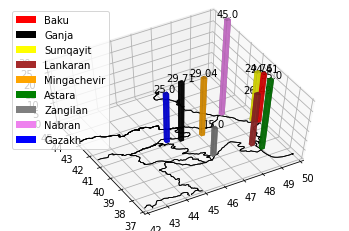

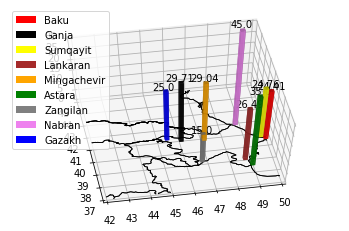

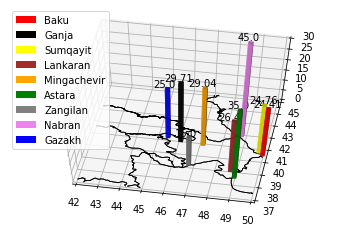

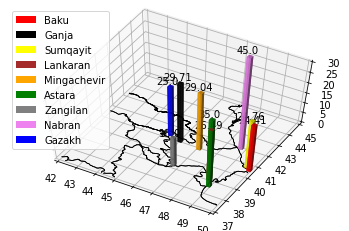

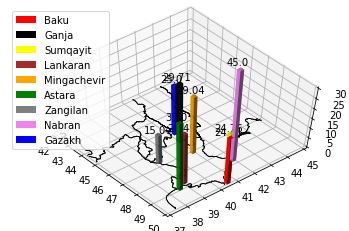

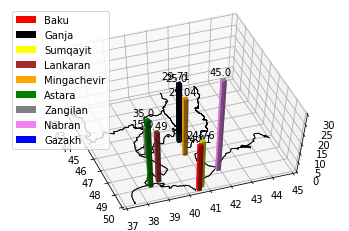

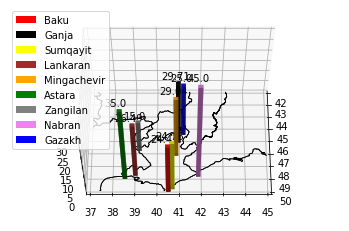

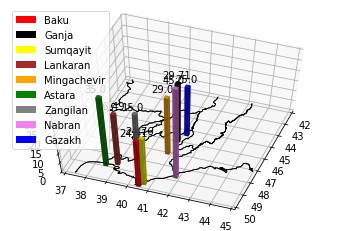

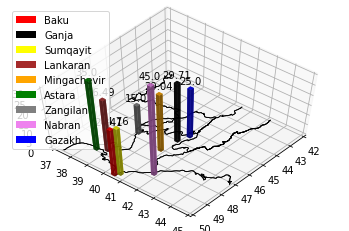

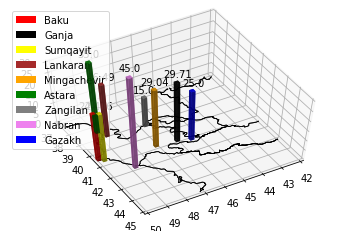

In [ ]:
for rounding in range(10):
  fig = plt.figure()
  ax = fig.gca(projection='3d')


  # Define lower left, uperright lontitude and lattitude respectively
  extent = [42,50,37,45]
  # Create a basemap instance that draws the Earth layer
  bm = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[2],
              urcrnrlon=extent[1], urcrnrlat=extent[3],
              projection='cyl', resolution='i', fix_aspect=False, ax=ax,area_thresh=100000)
  # Add Basemap to the figure
  ax.add_collection3d(bm.drawcoastlines(linewidth=0.8))
  ax.add_collection3d(bm.drawcountries(linewidth=0.8))
  ax.view_init(azim=240+20*rounding, elev=60)
  # Add meridian and parallel gridlines
  lon_step = 1
  lat_step = 1
  meridians = np.arange(extent[0], extent[1] + lon_step, lon_step)
  parallels = np.arange(extent[2], extent[3] + lat_step, lat_step)
  ax.set_yticks(parallels)
  ax.set_yticklabels(parallels)
  ax.set_xticks(meridians)
  ax.set_xticklabels(meridians)
  ax.set_zlim(0., 30.)
  colors=['red','black','yellow','brown','orange','green','grey','violet','blue']
  proxies=[]
  #p = ax.scatter(lons, lats, temperatures,cmap='jet')
  # Add a colorbar to reference the intensity
  ax.bar3d(lons,lats,0,0.2,0.2,temperatures,alpha=0.8,color=colors)
  for i,(lon,lat) in enumerate(zip(lons,lats)):
      ax.text(lon,lat,z=temperatures[i]+5,s=str(temperatures[i]), horizontalalignment='center', verticalalignment='top',fontsize='medium',alpha=1)
      proxies.append(plt.Rectangle((0,0),1,1,fc=colors[i]))
  ax.legend(proxies,cities,loc='upper left')
  plt.show()

AGAIN,THE CREATIVITY PART.USED 3D PLOT

In [ ]:
from skimage import data, io
import matplotlib.pyplot as plt
from imageio import imread
import numpy as np
import skimage.transform as si
map = imread('https://upload.wikimedia.org/wikipedia/commons/e/ed/Azerbaijan_districts_blank.png')

arr=np.array(map)
arr.shape
x_coor=[22,15,17,39,14,46,39,3,11]
y_coor=[38,12,33,30,18,28,14,28,3]
temperatures=[]
temperatures=np.concatenate([temperatures_mc,temperatures_c])
temperatures=temperatures.astype(int)
im = si.resize(arr,(50,40,4))

coordinates =[]
for x,y,t in zip(x_coor,y_coor,temperatures):
  coordinates.append([x,y,t])

x=[]
y=[]
z=[]
c=[]

for i in range(len(im)):
  for j in range(len(im[0])):
    for k in range(len(im[0][0])):
      if im[i][j][k]<0.98999:
        x.append(i)
        y.append(j)
        z.append(49)
        c.append(0)

for v in coordinates:
  x.append(v[0])
  y.append(v[1])
  z.append(49)
  c.append(v[2])

  x.append(v[0]+1)
  y.append(v[1])
  z.append(49)
  c.append(v[2])

  x.append(v[0]-1)
  y.append(v[1])
  z.append(49)
  c.append(v[2])

  x.append(v[0])
  y.append(v[1]+1)
  z.append(49)
  c.append(v[2])

  x.append(v[0])
  y.append(v[1]-1)
  z.append(49)
  c.append(v[2])

  i = 0
  for b in range(v[2]):
    i += 0.1
    x.append(v[0])
    y.append(v[1])
    z.append(49+i)
    c.append(v[2])

    x.append(v[0]+1)
    y.append(v[1])
    z.append(49+i)
    c.append(v[2])

    x.append(v[0]-1)
    y.append(v[1])
    z.append(49+i)
    c.append(v[2])

    x.append(v[0])
    y.append(v[1]+1)
    z.append(49+i)
    c.append(v[2])

    x.append(v[0])
    y.append(v[1]-1)
    z.append(49+i)
    c.append(v[2])

import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3.2,
        color=c,
        colorscale='Viridis',
        showscale=True))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()